In [1]:
import pandas as pd

email_data = pd.read_csv('C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/test_cleaned_category_email_dataset_machine_learning_model.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_23752\496921926.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  email_data = pd.read_csv('C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/test_cleaned_category_email_dataset_machine_learning_model.csv')


In [2]:
email_data['Combined_Text'] = email_data['Cleaned_Subject'].fillna('') + ' ' + email_data['Cleaned_Message'].fillna('')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    email_data['Combined_Text'],
    email_data['Category'],
    test_size=0.2,
    random_state=42,
    stratify=email_data['Category']
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 195097
Test set size: 48775


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training features shape: {X_train_tfidf.shape}")
print(f"Test features shape: {X_test_tfidf.shape}")

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display label mapping
print("Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i}: {label}")

Label Mapping:
0: Finance & Transaction Email
1: IT Alerts & System Notifications Email
2: Internal Policies & HR Updates Email
3: Legal & Contractual Email
4: Meeting & Schedule Email
5: Personal Email
6: Promotions or Marketing Email
7: Social Media Email
8: Spam Email
9: Utilities Bill Email
10: Work or Business Email


In [5]:
from sentence_transformers import SentenceTransformer
import numpy as np

# ✅ Load the pretrained model
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# ✅ Convert your Combined_Text column to string
X_train_text = X_train.astype(str).tolist()
X_test_text = X_test.astype(str).tolist()

# ✅ Generate dense embeddings
X_train_embed = embedder.encode(X_train_text, show_progress_bar=True)
X_test_embed = embedder.encode(X_test_text, show_progress_bar=True)

print("✅ BERT Embeddings - Train Shape:", np.array(X_train_embed).shape)
print("✅ BERT Embeddings - Test Shape:", np.array(X_test_embed).shape)

Batches:   0%|          | 0/6097 [00:00<?, ?it/s]

Batches:   0%|          | 0/1525 [00:00<?, ?it/s]

✅ BERT Embeddings - Train Shape: (195097, 384)
✅ BERT Embeddings - Test Shape: (48775, 384)


In [ ]:
np.save("X_train_embed.npy", X_train_embed)
np.save("X_test_embed.npy", X_test_embed)

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Train SVM model (you can tune kernel='linear' or 'rbf')
svm_model = SVC(
    kernel='linear',              # or 'rbf'
    class_weight='balanced',      # handles imbalance
    probability=True,             # needed for soft voting or confidence
    random_state=42
)

svm_model.fit(X_train_embed, y_train_encoded)

# ✅ Predict
y_pred = svm_model.predict(X_test_embed)

# ✅ Evaluate
print("✅ Accuracy (BERT + SVM):", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (BERT + SVM):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - BERT + SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Linear Regression

✅ Accuracy: 0.9997532539633582
📊 Classification Report (BERT + LR):
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Business Email       1.00  

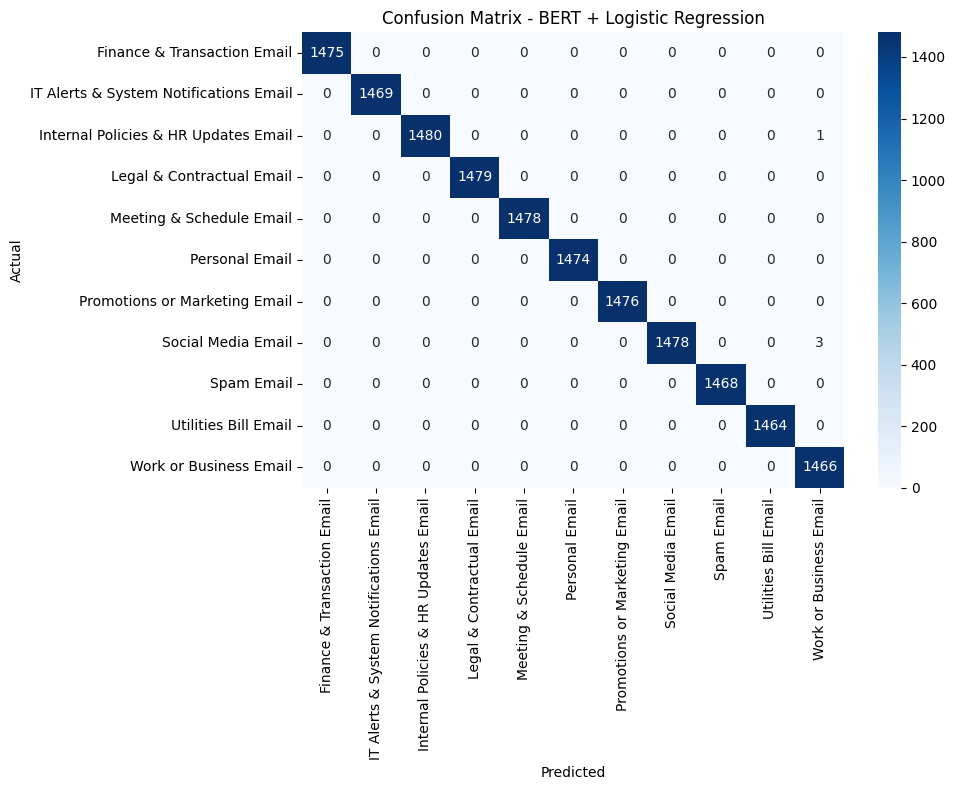

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=5000
)
lr_model.fit(X_train_embed, y_train_encoded)

# ✅ Predict
y_pred = lr_model.predict(X_test_embed)

# ✅ Evaluate
print("✅ Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (BERT + LR):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - BERT + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Random Forest

✅ Accuracy (BERT + Random Forest): 0.9995065079267165
📊 Classification Report (BERT + RF):
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      1.00      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Busi

C:\Users\User\AppData\Local\Temp\ipykernel_14608\515263455.py:37: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


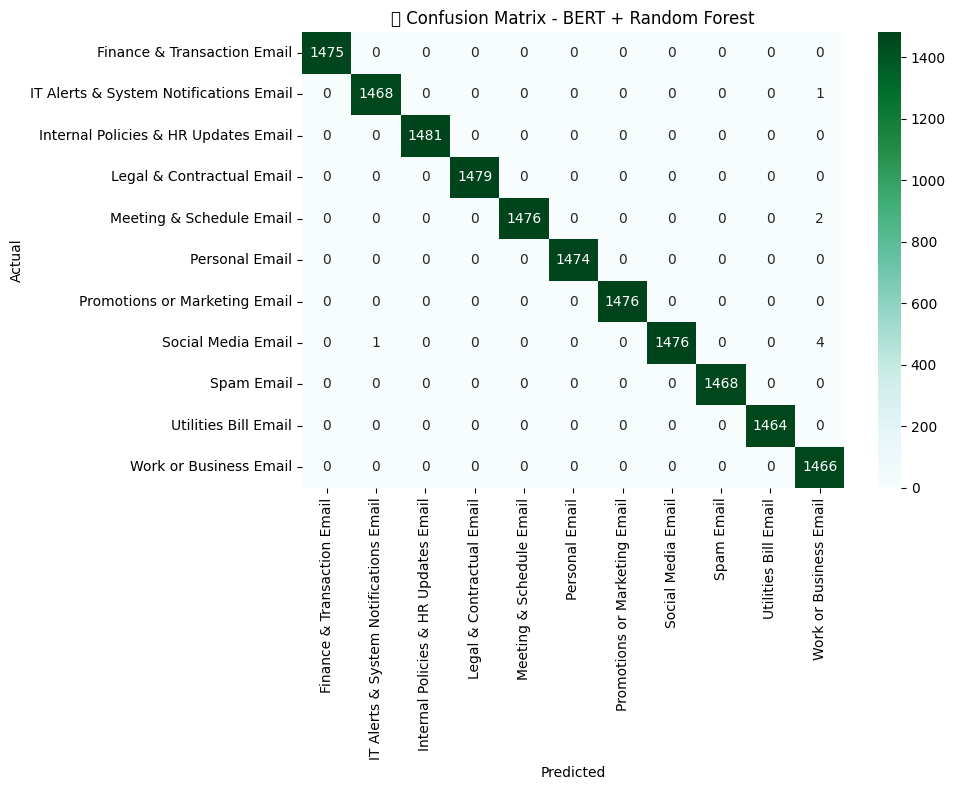

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# ✅ Train on BERT embeddings
rf_model.fit(X_train_embed, y_train_encoded)

# ✅ Predict
y_pred = rf_model.predict(X_test_embed)

# ✅ Evaluate
print("✅ Accuracy (BERT + Random Forest):", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (BERT + RF):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuGn")
plt.title("🌲 Confusion Matrix - BERT + Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# XG Boost

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:59:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy (BERT + XGBoost): 0.9986428967984702
📊 Classification Report (BERT + XGBoost):
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      0.99      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work or Busin

C:\Users\User\AppData\Local\Temp\ipykernel_14608\3730051586.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


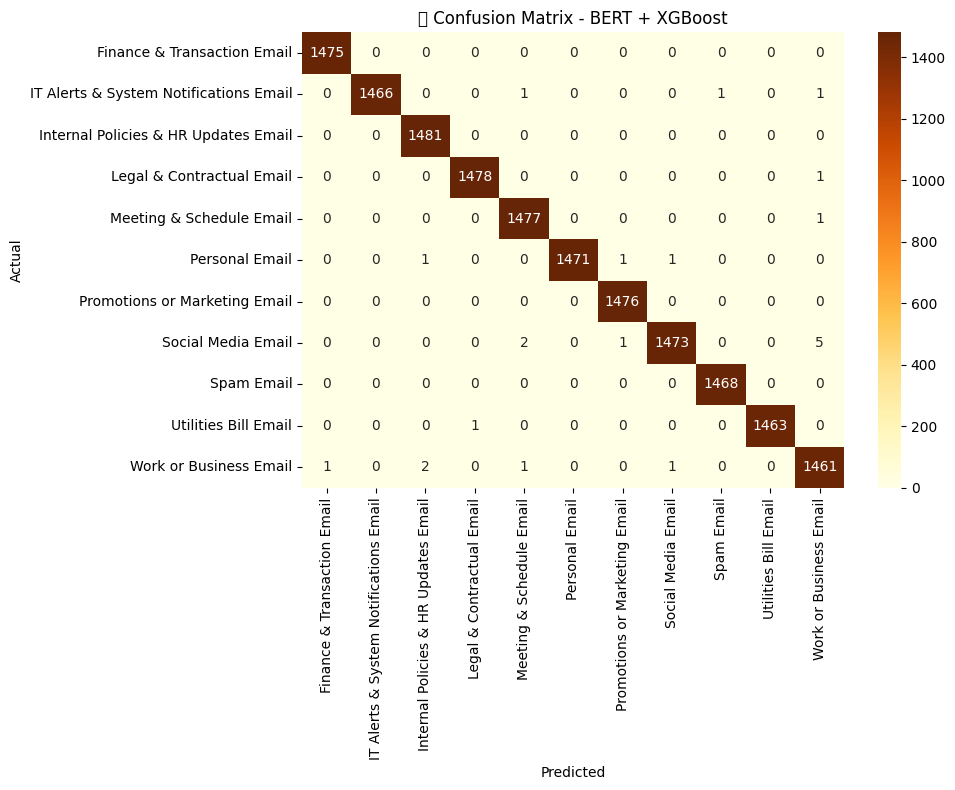

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Initialize XGBoost model (using CPU or GPU)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',   # 'gpu_hist' if GPU is available
    random_state=42
)

# ✅ Train on BERT embeddings
xgb_model.fit(X_train_embed, y_train_encoded)

# ✅ Predict
y_pred = xgb_model.predict(X_test_embed)

# ✅ Evaluate
print("✅ Accuracy (BERT + XGBoost):", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (BERT + XGBoost):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr")
plt.title("📈 Confusion Matrix - BERT + XGBoost")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Naive Bayes

✅ Accuracy (BERT + Naive Bayes): 0.9913022022083771
📊 Classification Report (BERT + GaussianNB):
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      0.98      0.99      1469
  Internal Policies & HR Updates Email       1.00      0.99      0.99      1481
             Legal & Contractual Email       1.00      0.98      0.99      1479
              Meeting & Schedule Email       0.99      0.99      0.99      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      0.98      0.99      1481
                            Spam Email       0.99      0.99      0.99      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work o

C:\Users\User\AppData\Local\Temp\ipykernel_14608\3687591597.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


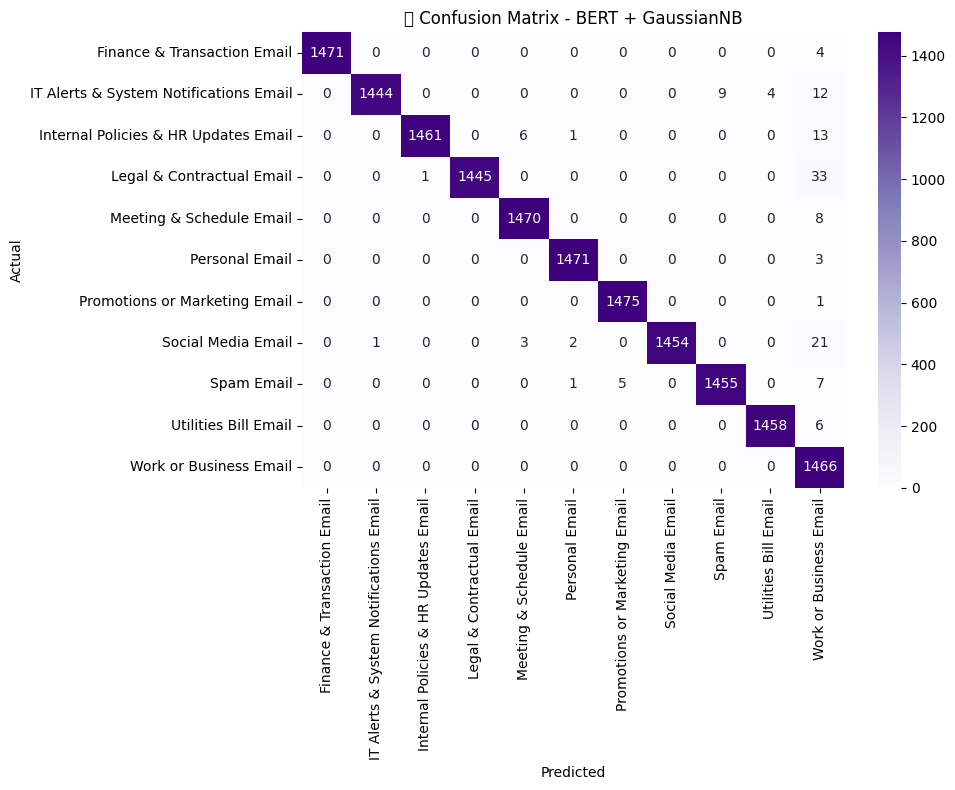

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# ✅ Train on BERT embeddings
nb_model.fit(X_train_embed, y_train_encoded)

# ✅ Predict
y_pred = nb_model.predict(X_test_embed)

# ✅ Evaluate
print("✅ Accuracy (BERT + Naive Bayes):", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (BERT + GaussianNB):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
plt.title("📊 Confusion Matrix - BERT + GaussianNB")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Hybrid Model

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:01:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy (BERT + Hybrid Soft Voting): 0.9987662698167911
📊 Classification Report (BERT Hybrid):
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      1.00      1.00      1475
IT Alerts & System Notifications Email       1.00      1.00      1.00      1469
  Internal Policies & HR Updates Email       1.00      1.00      1.00      1481
             Legal & Contractual Email       1.00      1.00      1.00      1479
              Meeting & Schedule Email       1.00      1.00      1.00      1478
                        Personal Email       1.00      1.00      1.00      1474
         Promotions or Marketing Email       1.00      1.00      1.00      1476
                    Social Media Email       1.00      0.99      1.00      1481
                            Spam Email       1.00      1.00      1.00      1468
                  Utilities Bill Email       1.00      1.00      1.00      1464
                Work 

C:\Users\User\AppData\Local\Temp\ipykernel_14608\2278910094.py:33: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


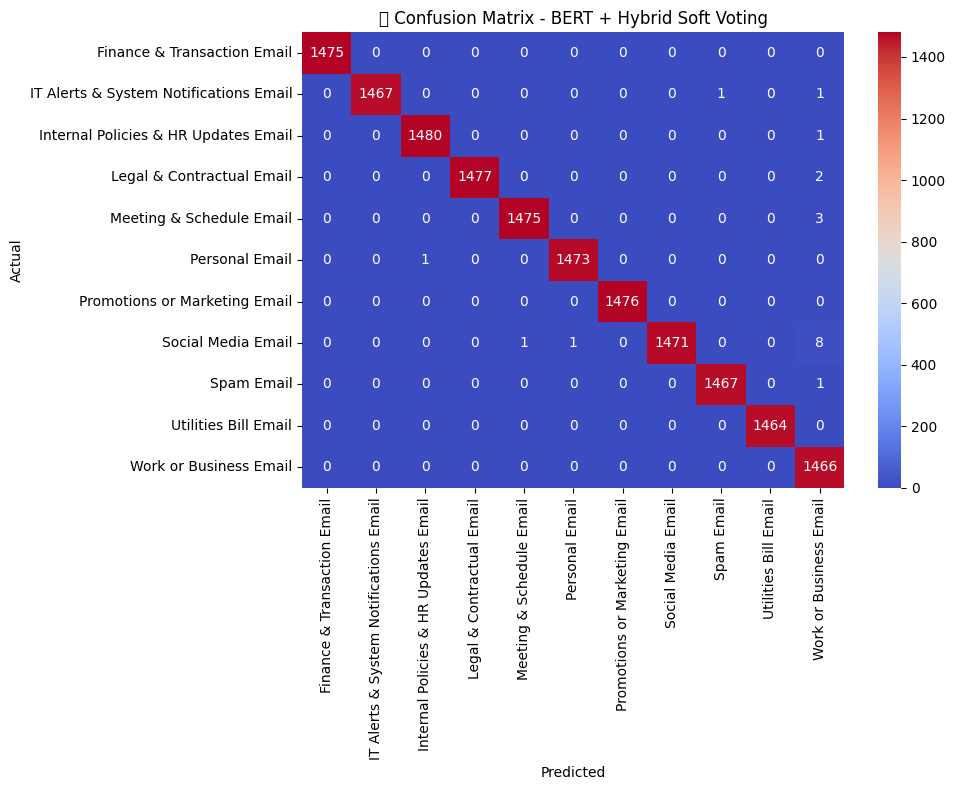

In [12]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('xgb', xgb_model),
        ('nb', nb_model)
    ],
    voting='soft'  # soft = average probabilities
)

# === Train hybrid model on BERT embeddings ===
voting_model.fit(X_train_embed, y_train_encoded)

# === Predict and evaluate ===
y_pred = voting_model.predict(X_test_embed)

print("✅ Accuracy (BERT + Hybrid Soft Voting):", accuracy_score(y_test_encoded, y_pred))
print("📊 Classification Report (BERT Hybrid):")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# === Confusion Matrix ===
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test_encoded, y_pred),
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("🔀 Confusion Matrix - BERT + Hybrid Soft Voting")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# Save Model

In [13]:
import joblib
import os
import numpy as np

# === Define your save directory ===
save_dir = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Bert Results"

# === Create the directory if it doesn't exist ===
os.makedirs(save_dir, exist_ok=True)

# === Save individual models ===
joblib.dump(lr_model, os.path.join(save_dir, 'bert_lr_model.joblib'))        # Logistic Regression
joblib.dump(rf_model, os.path.join(save_dir, 'bert_rf_model.joblib'))        # Random Forest
joblib.dump(svm_model, os.path.join(save_dir, 'bert_svm_model.joblib'))      # SVM
joblib.dump(xgb_model, os.path.join(save_dir, 'bert_xgb_model.joblib'))      # XGBoost
joblib.dump(nb_model, os.path.join(save_dir, 'bert_nb_model.joblib'))        # Gaussian Naive Bayes
joblib.dump(voting_model, os.path.join(save_dir, 'bert_hybrid_soft_model.joblib'))  # Hybrid Soft Voting

# === Save encoder and embedder ===
joblib.dump(label_encoder, os.path.join(save_dir, 'label_encoder.joblib'))

# Save BERT embedder model (to a subfolder)
embedder.save(os.path.join(save_dir, 'bert_embedder_model'))

# Test Data

Batches:   0%|          | 0/72 [00:00<?, ?it/s]

✅ Accuracy: 0.6076721883173496

📊 Classification Report:

                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.00      0.00      0.00         6
IT Alerts & System Notifications Email       0.82      0.35      0.49       272
             Legal & Contractual Email       0.00      0.00      0.00         1
              Meeting & Schedule Email       0.00      0.00      0.00         1
                        Personal Email       0.01      0.20      0.01         5
         Promotions or Marketing Email       0.83      0.69      0.75      1282
                    Social Media Email       0.63      0.82      0.71       434
                            Spam Email       0.00      0.00      0.00         1
                Work or Business Email       0.16      0.20      0.18       292

                             micro avg       0.61      0.61      0.61      2294
                             macro avg       0.27      0.25 

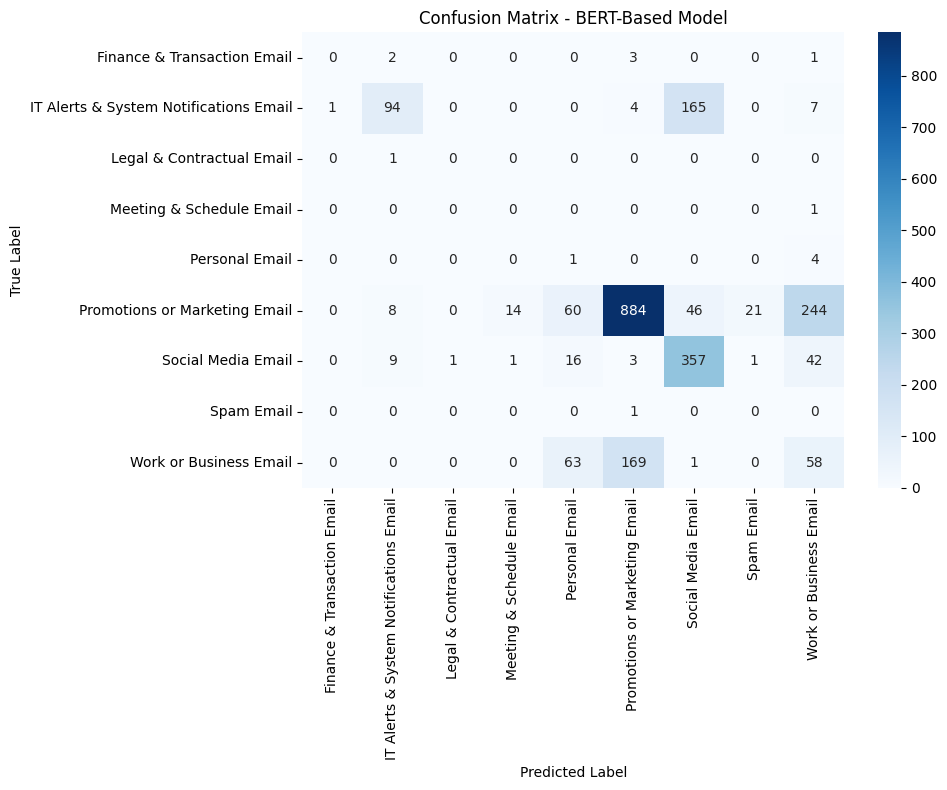

In [14]:
import pandas as pd
import joblib
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Step 1: Load test data ===
test_data_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/emails_202504202357.csv"
df_test = pd.read_csv(test_data_path)

# === Step 2: Load saved model components ===
save_dir = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Bert Results"

model_path = os.path.join(save_dir, 'bert_hybrid_soft_model.joblib')  # <-- Change this to 'bert_lr_model.joblib', etc.
encoder_path = os.path.join(save_dir, 'label_encoder.joblib')
embedder_path = os.path.join(save_dir, 'bert_embedder_model')

model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)
embedder = SentenceTransformer(embedder_path)

# === Step 3: Preprocess & Embed test data ===
df_test['Combined_Text'] = df_test['Subject'].fillna('') + ' ' + df_test['Message'].fillna('')
X_test_text = df_test['Combined_Text'].astype(str).tolist()
X_test_embed = embedder.encode(X_test_text, show_progress_bar=True)

# === Step 4: Encode true labels if available ===
if 'True_Category' in df_test.columns:
    y_true = label_encoder.transform(df_test['True_Category'])

# === Step 5: Predict
y_pred = model.predict(X_test_embed)
df_test['Predicted_Label'] = y_pred
df_test['Predicted_Category'] = label_encoder.inverse_transform(y_pred)

# === Step 6: Evaluation
if 'True_Category' in df_test.columns:
    print("✅ Accuracy:", accuracy_score(y_true, y_pred))

    unique_classes = np.unique(y_true)
    target_names = label_encoder.inverse_transform(unique_classes)

    print("\n📊 Classification Report:\n")
    print(classification_report(y_true, y_pred, labels=unique_classes, target_names=target_names))

    # === Step 7: Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=target_names, yticklabels=target_names, cmap="Blues")
    plt.title("Confusion Matrix - BERT-Based Model")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


Batches:   0%|          | 0/385 [00:00<?, ?it/s]


🚀 Evaluating: Logistic Regression
✅ Accuracy: 0.9275
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      0.99      1.00       939
IT Alerts & System Notifications Email       0.96      0.85      0.90      1168
  Internal Policies & HR Updates Email       0.97      1.00      0.98       965
             Legal & Contractual Email       0.97      1.00      0.98       956
              Meeting & Schedule Email       0.98      1.00      0.99       929
                        Personal Email       0.85      1.00      0.92       951
         Promotions or Marketing Email       0.93      0.82      0.87      2171
                    Social Media Email       0.85      0.96      0.90      1397
                            Spam Email       0.93      1.00      0.96       790
                  Utilities Bill Email       1.00      1.00      1.00       785
                Work or Business Email       0.87      0.79      

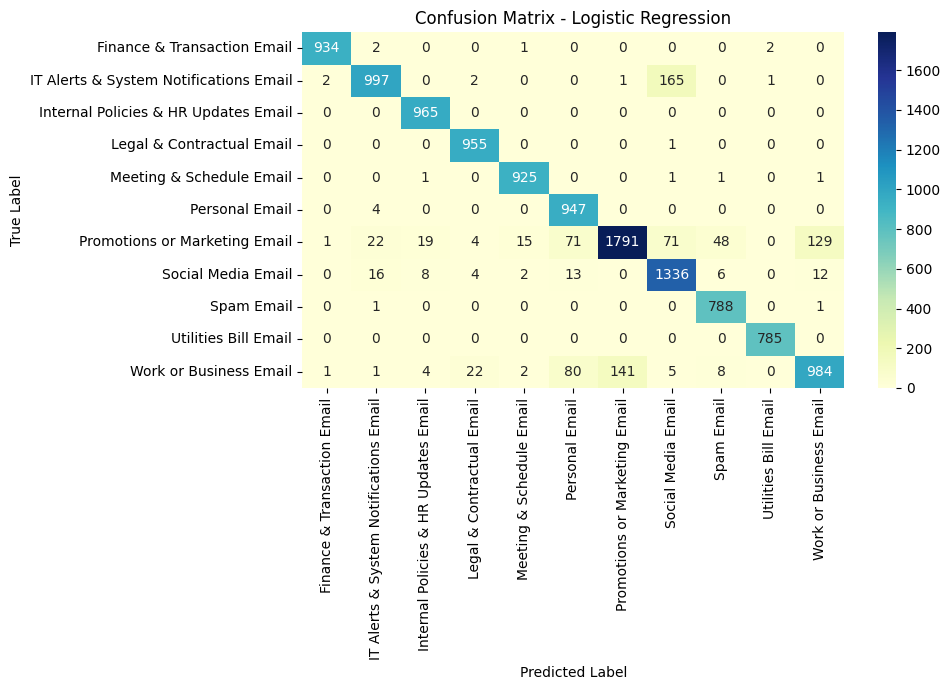


🚀 Evaluating: SVM
✅ Accuracy: 0.9252
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.99      1.00      0.99       939
IT Alerts & System Notifications Email       0.96      0.85      0.90      1168
  Internal Policies & HR Updates Email       0.97      1.00      0.98       965
             Legal & Contractual Email       0.98      1.00      0.99       956
              Meeting & Schedule Email       0.98      1.00      0.99       929
                        Personal Email       0.80      1.00      0.89       951
         Promotions or Marketing Email       0.99      0.80      0.88      2171
                    Social Media Email       0.82      0.95      0.88      1397
                            Spam Email       0.92      1.00      0.96       790
                  Utilities Bill Email       0.99      1.00      1.00       785
                Work or Business Email       0.86      0.82      0.84      1248



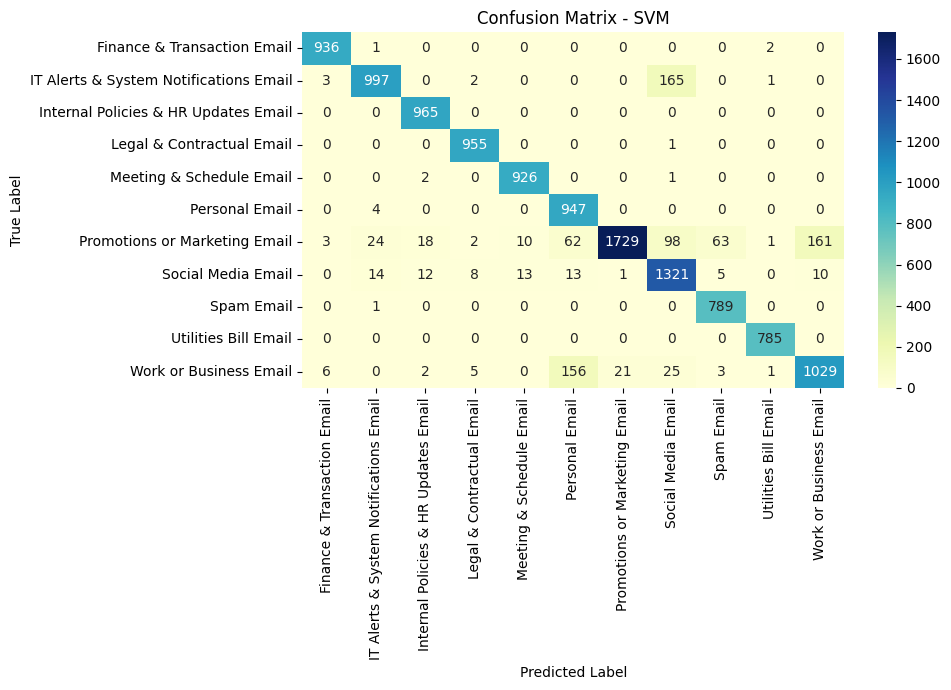


🚀 Evaluating: Random Forest
✅ Accuracy: 0.9228
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.99      1.00      0.99       939
IT Alerts & System Notifications Email       0.98      0.83      0.90      1168
  Internal Policies & HR Updates Email       0.98      1.00      0.99       965
             Legal & Contractual Email       0.97      1.00      0.98       956
              Meeting & Schedule Email       0.98      0.99      0.99       929
                        Personal Email       0.90      0.99      0.95       951
         Promotions or Marketing Email       0.91      0.82      0.86      2171
                    Social Media Email       0.81      0.95      0.88      1397
                            Spam Email       0.94      1.00      0.97       790
                  Utilities Bill Email       0.99      1.00      1.00       785
                Work or Business Email       0.83      0.79      0.81  

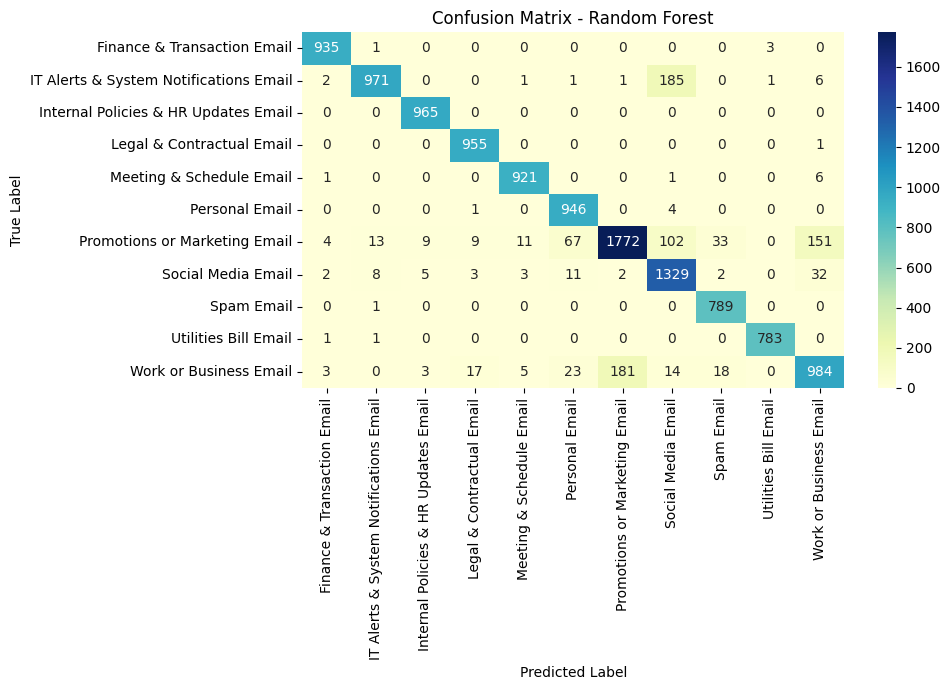


🚀 Evaluating: XGBoost
✅ Accuracy: 0.8896
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.98      0.99      0.99       939
IT Alerts & System Notifications Email       0.69      0.83      0.75      1168
  Internal Policies & HR Updates Email       0.97      1.00      0.98       965
             Legal & Contractual Email       0.94      1.00      0.97       956
              Meeting & Schedule Email       0.96      0.99      0.97       929
                        Personal Email       0.94      0.99      0.96       951
         Promotions or Marketing Email       0.90      0.82      0.86      2171
                    Social Media Email       0.81      0.95      0.87      1397
                            Spam Email       0.91      1.00      0.95       790
                  Utilities Bill Email       0.99      0.49      0.65       785
                Work or Business Email       0.91      0.79      0.84      12

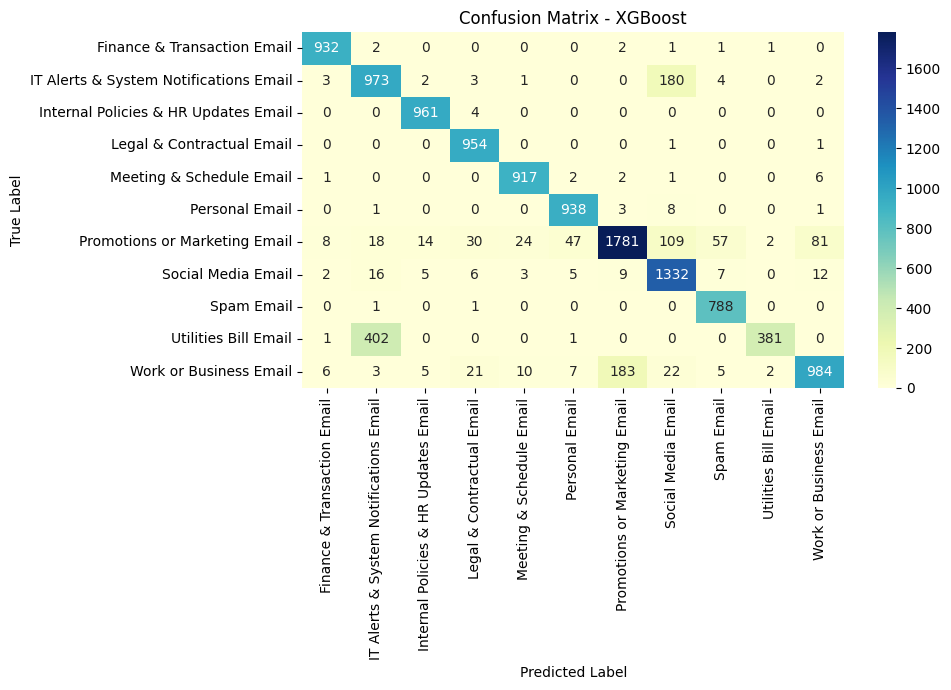


🚀 Evaluating: Naive Bayes
✅ Accuracy: 0.9153
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      0.99      1.00       939
IT Alerts & System Notifications Email       0.98      0.84      0.91      1168
  Internal Policies & HR Updates Email       0.99      0.96      0.97       965
             Legal & Contractual Email       1.00      0.99      0.99       956
              Meeting & Schedule Email       0.98      0.96      0.97       929
                        Personal Email       0.86      1.00      0.93       951
         Promotions or Marketing Email       0.91      0.82      0.86      2171
                    Social Media Email       0.87      0.93      0.90      1397
                            Spam Email       0.98      0.97      0.97       790
                  Utilities Bill Email       1.00      1.00      1.00       785
                Work or Business Email       0.70      0.81      0.75    

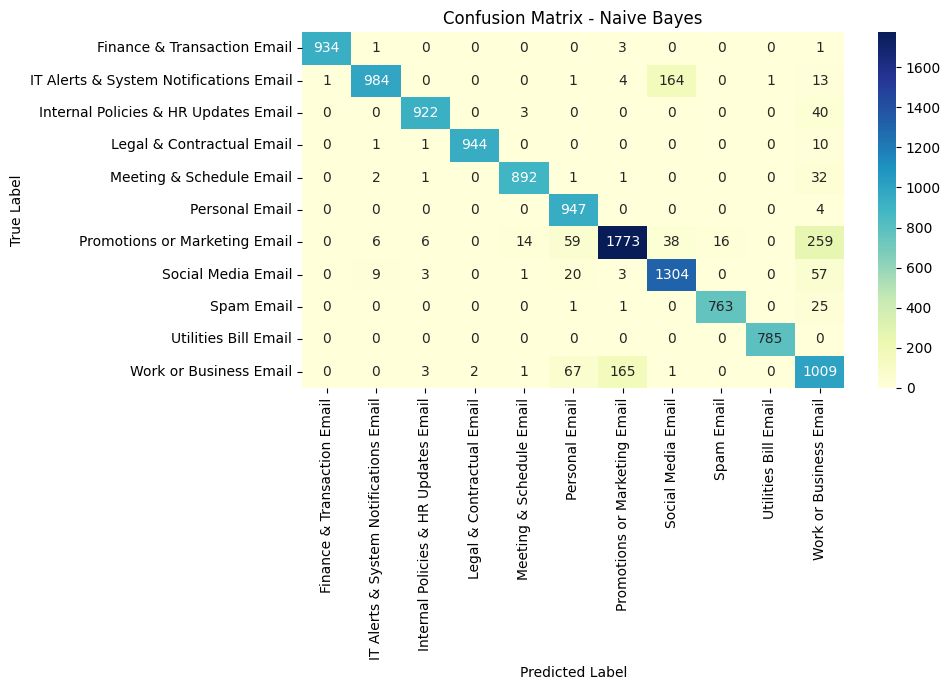


🚀 Evaluating: Hybrid
✅ Accuracy: 0.9250
                                        precision    recall  f1-score   support

           Finance & Transaction Email       1.00      0.99      1.00       939
IT Alerts & System Notifications Email       0.98      0.85      0.91      1168
  Internal Policies & HR Updates Email       0.99      1.00      0.99       965
             Legal & Contractual Email       1.00      1.00      1.00       956
              Meeting & Schedule Email       0.98      0.99      0.99       929
                        Personal Email       0.87      1.00      0.93       951
         Promotions or Marketing Email       0.91      0.82      0.86      2171
                    Social Media Email       0.86      0.94      0.90      1397
                            Spam Email       0.97      1.00      0.98       790
                  Utilities Bill Email       1.00      1.00      1.00       785
                Work or Business Email       0.76      0.81      0.78      124

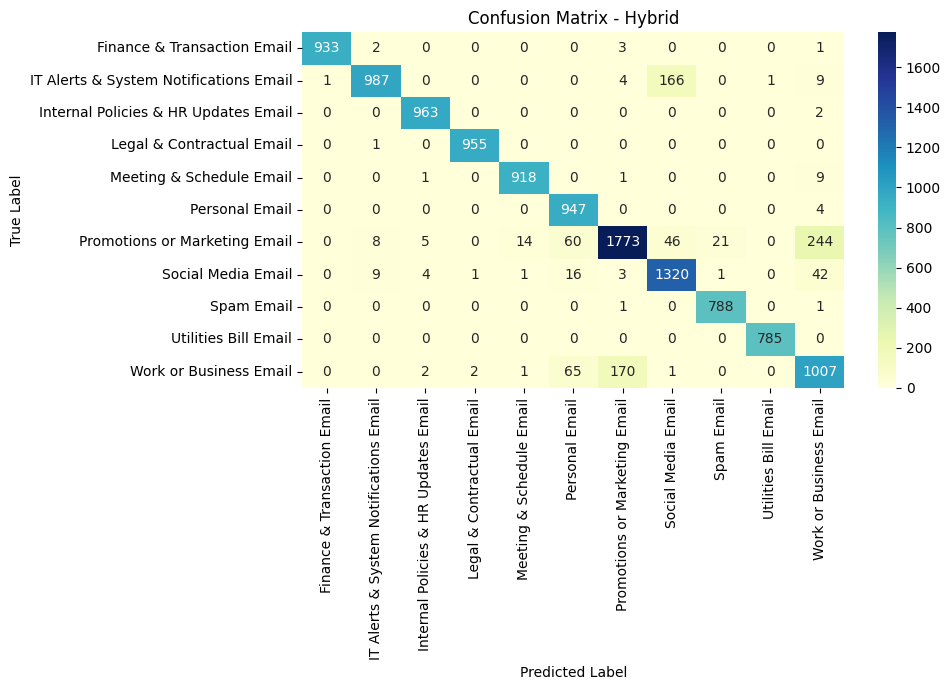


📊 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.927474   0.935114  0.945995  0.938841
1                  SVM  0.925197   0.931751  0.946107  0.936158
5               Hybrid  0.924953   0.938172  0.944127  0.939848
2        Random Forest  0.922839   0.934587  0.942213  0.936785
4          Naive Bayes  0.915278   0.932244  0.932765  0.930839
3              XGBoost  0.889585   0.907677  0.894353  0.891167


C:\Users\User\AppData\Local\Temp\ipykernel_14608\2214708681.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_14608\2214708681.py:93: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


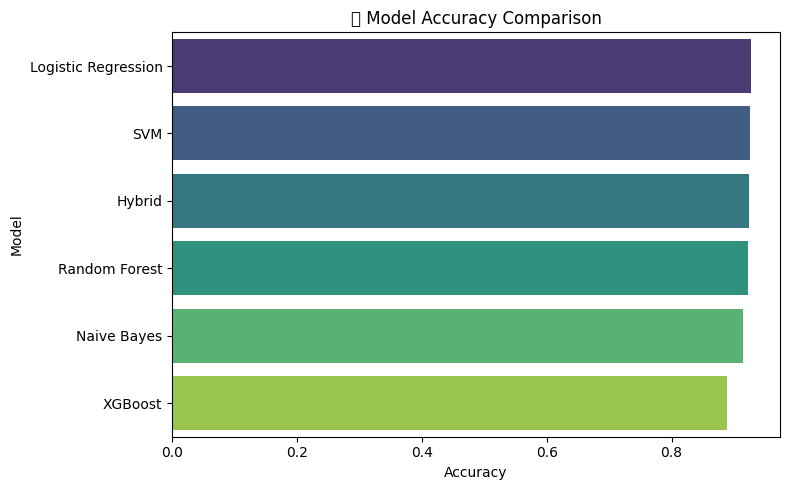

In [15]:
import pandas as pd
import joblib
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Step 1: Load test data ===
test_data_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/rewritten_batch1_emails_polished_testing_data.csv"
df_test = pd.read_csv(test_data_path)

# === Step 2: Load label encoder and BERT embedder ===
save_dir = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Bert Results"
encoder_path = os.path.join(save_dir, 'label_encoder.joblib')
embedder_path = os.path.join(save_dir, 'bert_embedder_model')

label_encoder = joblib.load(encoder_path)
embedder = SentenceTransformer(embedder_path)

# === Step 3: Preprocess and Embed ===
df_test['Combined_Text'] = df_test['Subject'].fillna('') + ' ' + df_test['Message'].fillna('')
X_test_text = df_test['Combined_Text'].astype(str).tolist()
X_test_embed = embedder.encode(X_test_text, show_progress_bar=True)

# === Step 4: Encode true labels if available ===
if 'True_Category' in df_test.columns:
    y_true = label_encoder.transform(df_test['True_Category'])

# === Step 5: Define all BERT-based model paths ===
model_paths = {
    "Logistic Regression": os.path.join(save_dir, 'bert_lr_model.joblib'),
    "SVM": os.path.join(save_dir, 'bert_svm_model.joblib'),
    "Random Forest": os.path.join(save_dir, 'bert_rf_model.joblib'),
    "XGBoost": os.path.join(save_dir, 'bert_xgb_model.joblib'),
    "Naive Bayes": os.path.join(save_dir, 'bert_nb_model.joblib'),
    "Hybrid": os.path.join(save_dir, 'bert_hybrid_soft_model.joblib')
}

# === Step 6: Evaluate All Models ===
comparison_results = []

for model_name, model_path in model_paths.items():
    print(f"\n🚀 Evaluating: {model_name}")
    model = joblib.load(model_path)
    y_pred = model.predict(X_test_embed)

    # ✅ Identify present classes in test set
    unique_labels = np.unique(y_true)
    target_names = label_encoder.inverse_transform(unique_labels)

    # ✅ Metrics
    acc = accuracy_score(y_true, y_pred)
    report_dict = classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names, output_dict=True)

    # ✅ Append to summary
    comparison_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": report_dict["macro avg"]["precision"],
        "Recall": report_dict["macro avg"]["recall"],
        "F1-Score": report_dict["macro avg"]["f1-score"]
    })

    # ✅ Print report
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names))

    # ✅ Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

# === Step 7: Compare All Models ===
comparison_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)

print("\n📊 Model Comparison Summary:")
print(comparison_df)

# === Step 8: Plot Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
plt.title("📈 Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


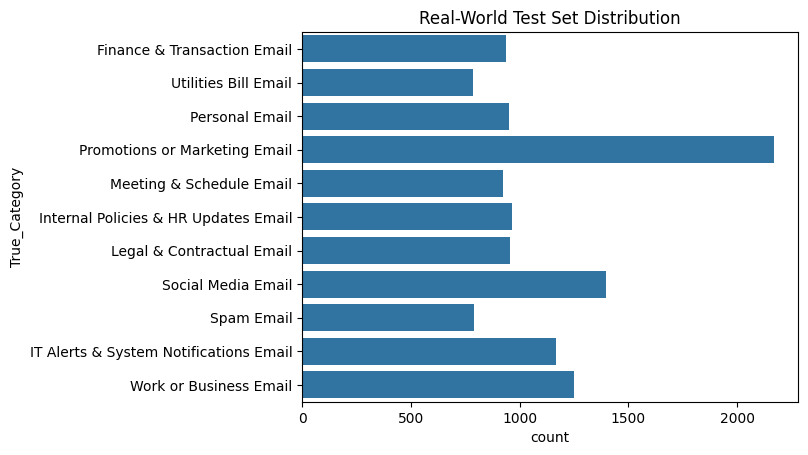

In [27]:
df_test['True_Category'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='True_Category', data=df_test)
plt.title('Real-World Test Set Distribution')
plt.show()

In [28]:
df_test['True_Category'].value_counts()

True_Category
Promotions or Marketing Email             2171
Social Media Email                        1397
Work or Business Email                    1248
IT Alerts & System Notifications Email    1168
Internal Policies & HR Updates Email       965
Legal & Contractual Email                  956
Personal Email                             951
Finance & Transaction Email                939
Meeting & Schedule Email                   925
Spam Email                                 790
Utilities Bill Email                       784
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_10088\1796341944.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


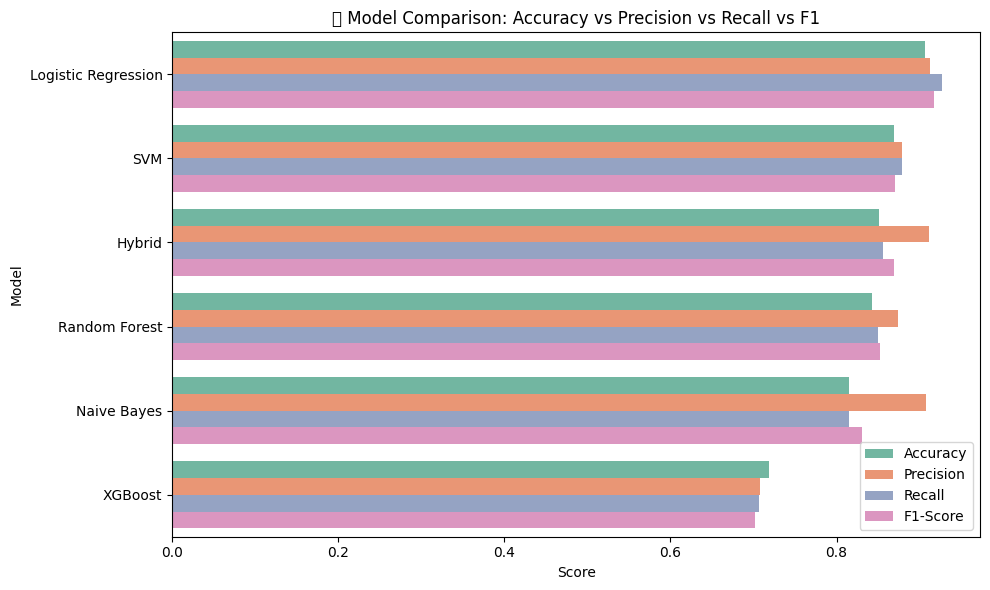

In [21]:
# 📊 Comparison of all metrics
comparison_df_long = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_long, x="Score", y="Model", hue="Metric", palette="Set2")
plt.title("📊 Model Comparison: Accuracy vs Precision vs Recall vs F1")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Additional - Real Email

Batches:   0%|          | 0/601 [00:00<?, ?it/s]


🚀 Evaluating: SVM
✅ Accuracy: 0.4115
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.52      0.08      0.14      5554
IT Alerts & System Notifications Email       0.46      0.80      0.58      2404
  Internal Policies & HR Updates Email       0.05      0.26      0.09       141
             Legal & Contractual Email       0.37      0.49      0.42      1390
              Meeting & Schedule Email       0.66      0.60      0.63      2707
                        Personal Email       0.60      0.39      0.48      1691
         Promotions or Marketing Email       0.29      0.15      0.20       779
                Work or Business Email       0.40      0.53      0.45      4556

                             micro avg       0.45      0.41      0.43     19222
                             macro avg       0.42      0.41      0.37     19222
                          weighted avg       0.48      0.41      0.39     19222


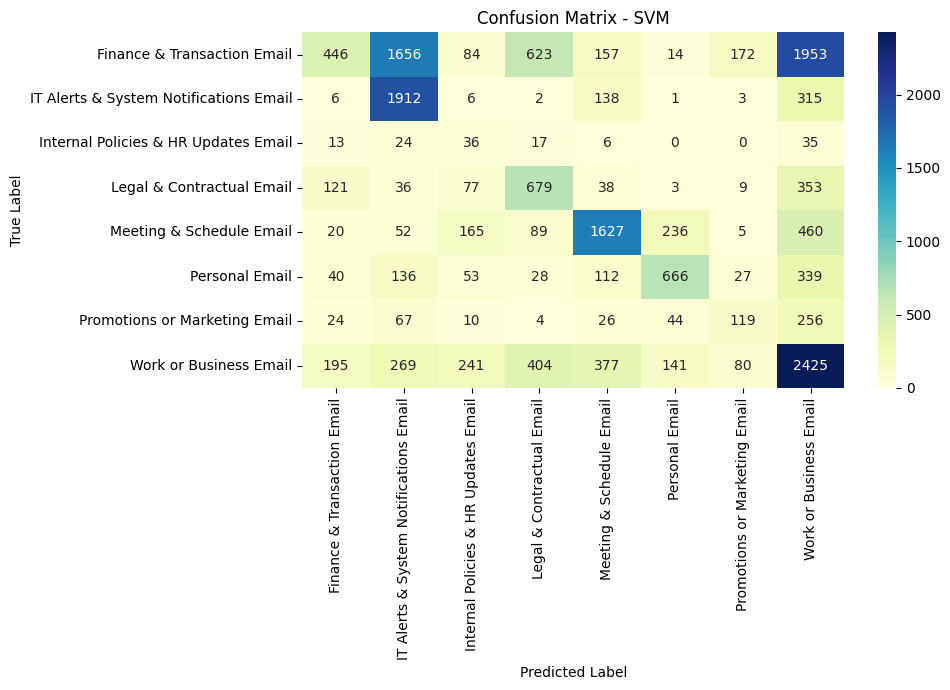


🚀 Evaluating: Logistic Regression
✅ Accuracy: 0.4201
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.48      0.09      0.15      5554
IT Alerts & System Notifications Email       0.46      0.83      0.59      2404
  Internal Policies & HR Updates Email       0.05      0.26      0.08       141
             Legal & Contractual Email       0.37      0.59      0.46      1390
              Meeting & Schedule Email       0.67      0.64      0.65      2707
                        Personal Email       0.57      0.49      0.53      1691
         Promotions or Marketing Email       0.26      0.25      0.25       779
                Work or Business Email       0.42      0.43      0.42      4556

                             micro avg       0.45      0.42      0.44     19222
                             macro avg       0.41      0.45      0.39     19222
                          weighted avg       0.48      0.42     

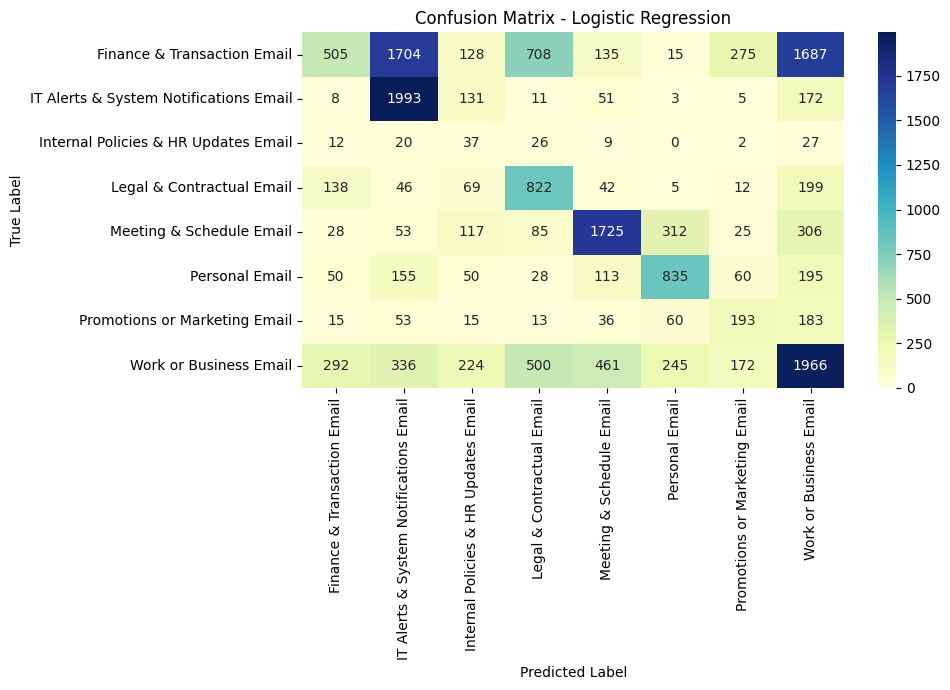


🚀 Evaluating: Random Forest
✅ Accuracy: 0.3517
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.46      0.11      0.18      5554
IT Alerts & System Notifications Email       0.69      0.43      0.53      2404
  Internal Policies & HR Updates Email       0.03      0.19      0.05       141
             Legal & Contractual Email       0.35      0.45      0.39      1390
              Meeting & Schedule Email       0.37      0.57      0.45      2707
                        Personal Email       0.55      0.43      0.48      1691
         Promotions or Marketing Email       0.18      0.24      0.21       779
                Work or Business Email       0.37      0.44      0.41      4556

                             micro avg       0.39      0.35      0.37     19222
                             macro avg       0.37      0.36      0.34     19222
                          weighted avg       0.44      0.35      0.36 

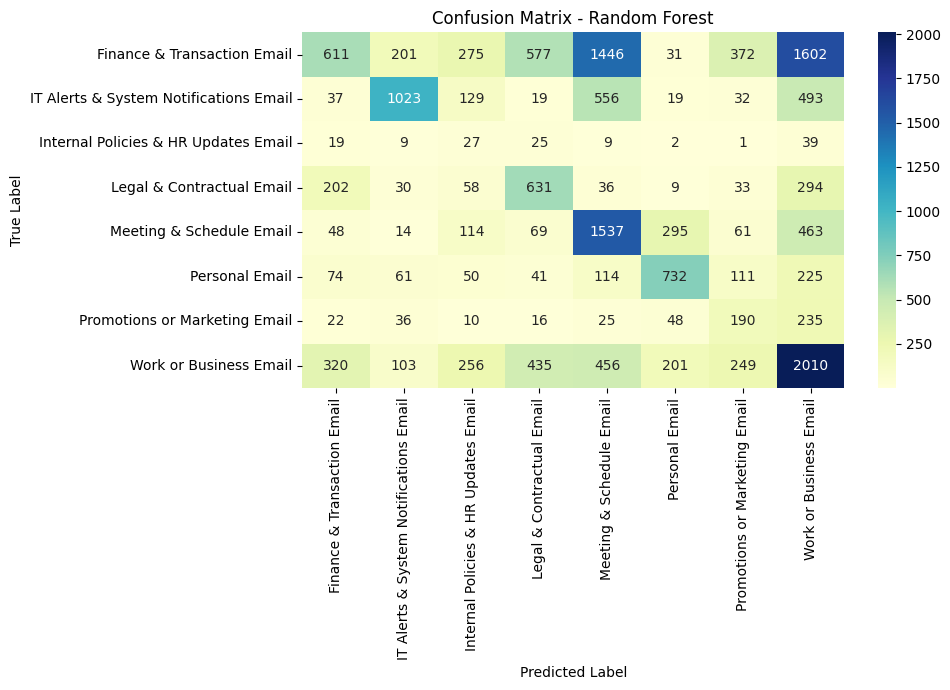


🚀 Evaluating: XGBoost
✅ Accuracy: 0.2803
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.39      0.06      0.10      5554
IT Alerts & System Notifications Email       0.48      0.36      0.41      2404
  Internal Policies & HR Updates Email       0.01      0.15      0.02       141
             Legal & Contractual Email       0.27      0.37      0.31      1390
              Meeting & Schedule Email       0.40      0.51      0.45      2707
                        Personal Email       0.50      0.30      0.37      1691
         Promotions or Marketing Email       0.13      0.21      0.16       779
                Work or Business Email       0.34      0.35      0.35      4556

                             micro avg       0.33      0.28      0.30     19222
                             macro avg       0.31      0.29      0.27     19222
                          weighted avg       0.38      0.28      0.29     19

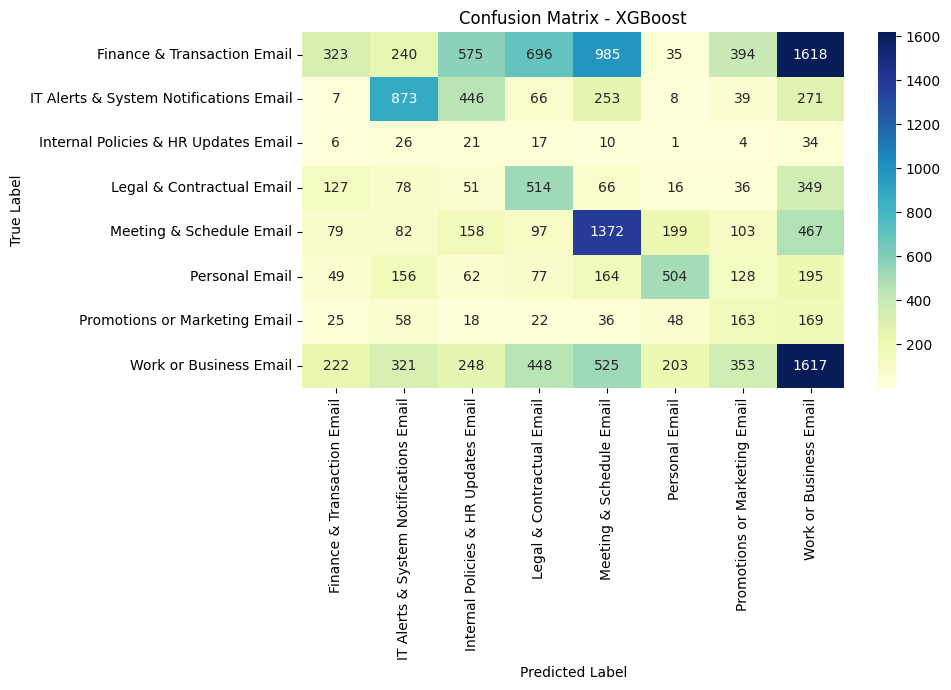


🚀 Evaluating: Naive Bayes
✅ Accuracy: 0.3961
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.56      0.03      0.05      5554
IT Alerts & System Notifications Email       0.73      0.49      0.59      2404
  Internal Policies & HR Updates Email       0.06      0.13      0.08       141
             Legal & Contractual Email       0.51      0.34      0.41      1390
              Meeting & Schedule Email       0.75      0.51      0.61      2707
                        Personal Email       0.54      0.49      0.51      1691
         Promotions or Marketing Email       0.24      0.37      0.29       779
                Work or Business Email       0.30      0.72      0.42      4556

                             micro avg       0.41      0.40      0.40     19222
                             macro avg       0.46      0.39      0.37     19222
                          weighted avg       0.52      0.40      0.36   

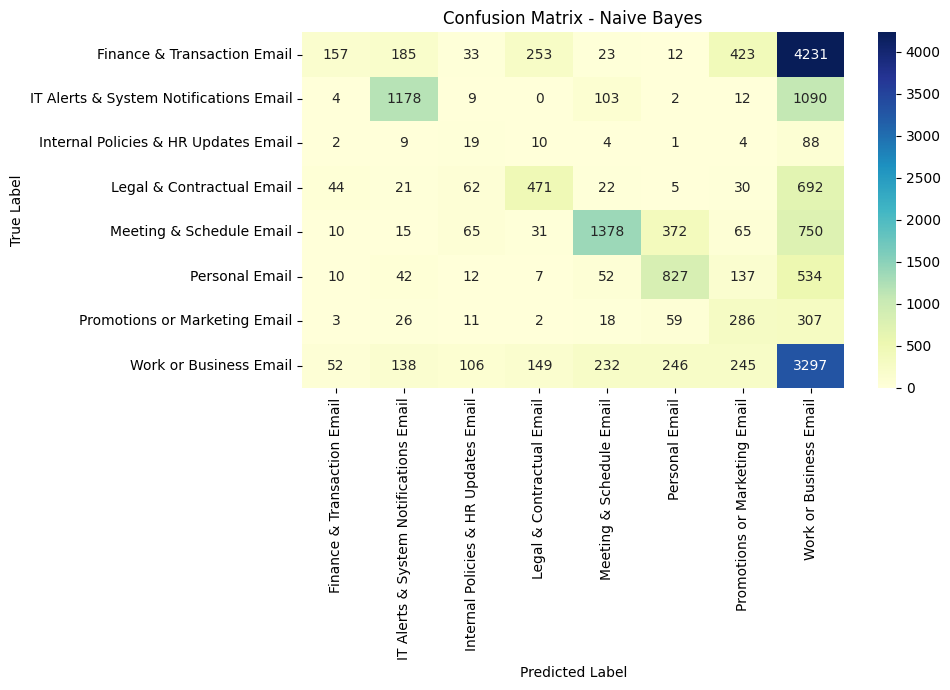


🚀 Evaluating: Hybrid
✅ Accuracy: 0.4071
                                        precision    recall  f1-score   support

           Finance & Transaction Email       0.56      0.04      0.07      5554
IT Alerts & System Notifications Email       0.73      0.54      0.62      2404
  Internal Policies & HR Updates Email       0.05      0.13      0.08       141
             Legal & Contractual Email       0.48      0.39      0.43      1390
              Meeting & Schedule Email       0.74      0.54      0.63      2707
                        Personal Email       0.55      0.49      0.52      1691
         Promotions or Marketing Email       0.23      0.34      0.27       779
                Work or Business Email       0.31      0.70      0.43      4556

                             micro avg       0.42      0.41      0.41     19222
                             macro avg       0.46      0.40      0.38     19222
                          weighted avg       0.52      0.41      0.38     192

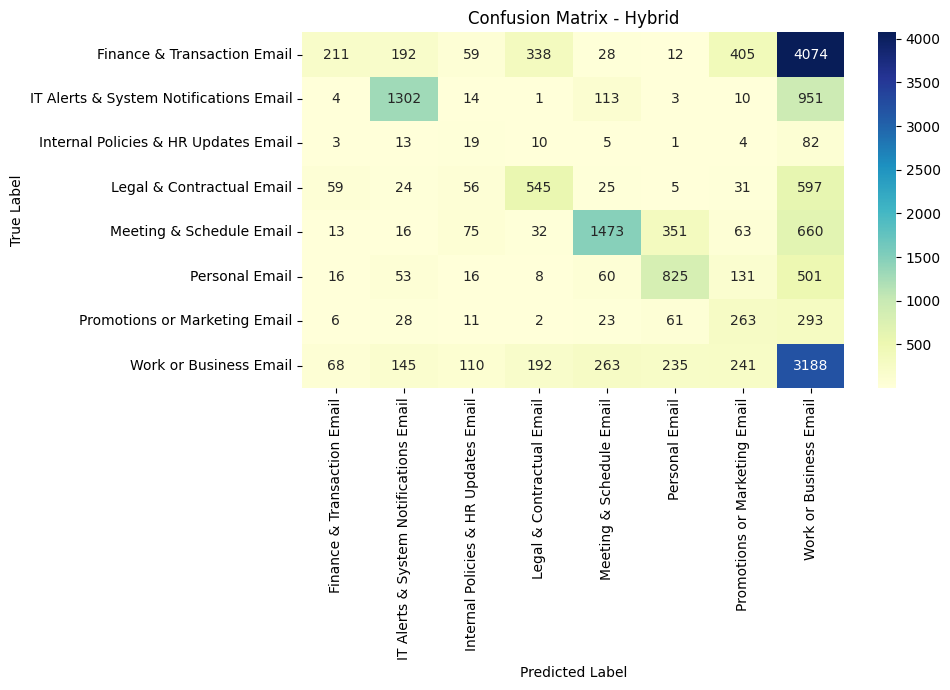


📊 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
1  Logistic Regression  0.420144   0.409150  0.448005  0.392490
0                  SVM  0.411508   0.417245  0.412420  0.373376
5               Hybrid  0.407138   0.456945  0.396975  0.381189
4          Naive Bayes  0.396057   0.461204  0.385099  0.370622
2        Random Forest  0.351732   0.374968  0.358343  0.336589
3              XGBoost  0.280252   0.314446  0.288633  0.272417


C:\Users\User\AppData\Local\Temp\ipykernel_14608\3076434318.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_14608\3076434318.py:94: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


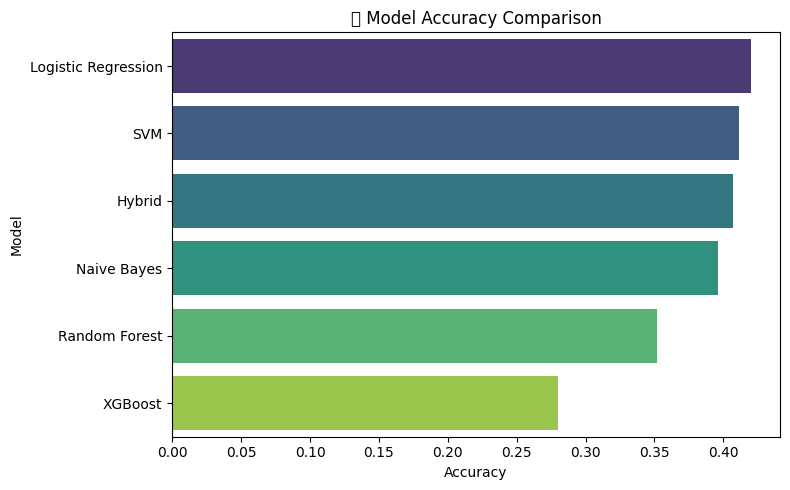

In [16]:
import pandas as pd
import joblib
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Step 1: Load test data ===
test_data_path = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/email_batch_8_labeled_qwen2.5-LAPTOP-DKNN9H6Q.csv"
df_test = pd.read_csv(test_data_path)

# === Step 2: Load label encoder and BERT embedder ===
save_dir = r"C:/Users/User/OneDrive - Asia Pacific University/APU Final Year Project/FYP Email Project Documents/Email Dataset Python/Model Building/Categorization/Test Bert Results"

encoder_path = os.path.join(save_dir, 'label_encoder.joblib')
embedder_path = os.path.join(save_dir, 'bert_embedder_model')

label_encoder = joblib.load(encoder_path)
embedder = SentenceTransformer(embedder_path)

# === Step 3: Preprocess and generate BERT embeddings ===
df_test['Combined_Text'] = df_test['Subject'].fillna('') + ' ' + df_test['Message'].fillna('')
X_test_text = df_test['Combined_Text'].astype(str).tolist()
X_test_embed = embedder.encode(X_test_text, show_progress_bar=True)

# === Step 4: Encode true labels if available ===
if 'True_Category' in df_test.columns:
    y_true = label_encoder.transform(df_test['True_Category'])

# === Step 5: Define All BERT-based Model Paths ===
model_paths = {
    "SVM": os.path.join(save_dir, 'bert_svm_model.joblib'),
    "Logistic Regression": os.path.join(save_dir, 'bert_lr_model.joblib'),
    "Random Forest": os.path.join(save_dir, 'bert_rf_model.joblib'),
    "XGBoost": os.path.join(save_dir, 'bert_xgb_model.joblib'),
    "Naive Bayes": os.path.join(save_dir, 'bert_nb_model.joblib'),
    "Hybrid": os.path.join(save_dir, 'bert_hybrid_soft_model.joblib')
}

# === Step 6: Evaluate All Models ===
comparison_results = []

for model_name, model_path in model_paths.items():
    print(f"\n🚀 Evaluating: {model_name}")
    model = joblib.load(model_path)
    y_pred = model.predict(X_test_embed)

    # ✅ Identify present classes in test set
    unique_labels = np.unique(y_true)
    target_names = label_encoder.inverse_transform(unique_labels)

    # ✅ Metrics
    acc = accuracy_score(y_true, y_pred)
    report_dict = classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names, output_dict=True)

    # ✅ Append to summary
    comparison_results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": report_dict["macro avg"]["precision"],
        "Recall": report_dict["macro avg"]["recall"],
        "F1-Score": report_dict["macro avg"]["f1-score"]
    })

    # ✅ Print report
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names))

    # ✅ Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d",
                xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

# === Step 7: Compare All Models ===
comparison_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)

print("\n📊 Model Comparison Summary:")
print(comparison_df)

# === Step 8: Plot Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x="Accuracy", y="Model", palette="viridis")
plt.title("📈 Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

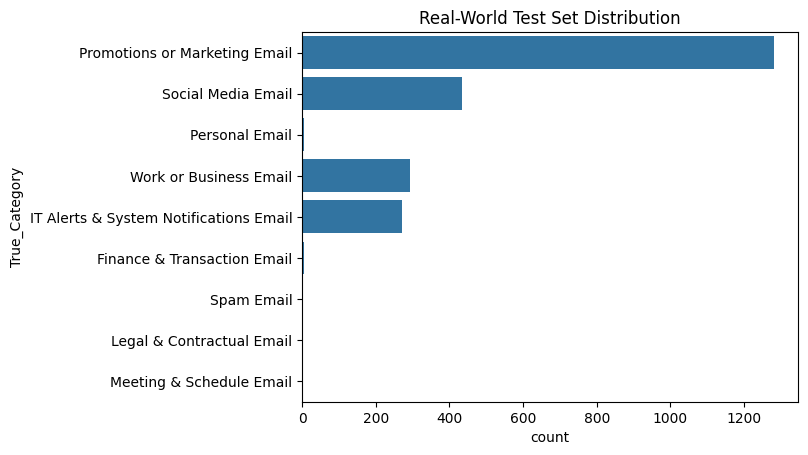

In [24]:
df_test['True_Category'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='True_Category', data=df_test)
plt.title('Real-World Test Set Distribution')
plt.show()
